<a href="https://colab.research.google.com/github/dm-fedorov/pandas_basic/blob/master/%D0%A2%D0%B5%D0%BF%D0%BB%D0%B8%D1%86%D0%B0/7.%20%D0%90%D0%B2%D0%B0%D1%80%D0%B8%D0%B9%D0%BD%D1%8B%D0%B5%20%D0%B4%D0%BE%D0%BC%D0%B0.ipynb" target="_blank"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

- `address` - Населенный пункт (наименование)
- `houseguid` - Адрес дома
- `cadastral_number` - Глобальный уникальный идентификатор дома
- `stage` - Дата постановки на кадастровый учет
- `built_year` - Стадия жизненного цикла
- `exploitation_start_year` - Год постройки
- `project_type` - Год ввода в эксплуатацию
- `house_type` - Серия, тип постройки здания
- `floor_count_max` - Тип дома
- `floor_count_min` - Наибольшее количество этажей, ед.
- `entrance_count` - Наименьшее количество этажей, ед.
- `residents_count` - Количество подъездов, ед.
- `area_total` - Количество проживающих, чел.
- `area_residential` - Общая площадь дома, всего, кв. м
- `area_non_residential` - Общая площадь жилых помещений, кв. м
- `area_common_property` - Общая площадь помещений, входящих в состав общего имущества, кв.м
- `area_land` - Площадь земельного участка, входящего в состав общего имущества в многоквартирном доме, кв.м
- `monument_status` - Наличие статуса памятника архитектуры
- `monument_document_date` - Дата документа о признании дома памятником архитектуры
- `monument_document_number` - Номер документа о признании дома памятником архитектуры
- `deterioration_total` - Общая степень износа здания
- `determined_date` - Дата, на которую установлен износ здания
- `floor_type` - Тип перекрытий
- `wall_material` - материал стен
- `alarm_reason` - Материал несущих стен
- `alarm_reason_other` - Причина признания дома аварийным
- `alarm_document_number` - Причина признания дома аварийным (другое)
- `alarm_has_file` - Номер решения органа местного самоуправления/органа исполнительной власти субъекта РФ о признании многоквартирного дома аварийным
- `exp_name` - Файл решения
- `exp_document_number` - Наименование специализированной организации, проводившей обследование многоквартирного дома
- `exp_document_date` - Номер экспертного заключения, проведенного специализированной организацией
- `exp_has_file` - Дата экспертного заключения
- `commission_document_number` - Файл экспертного заключения
- `commission_document_date` - Номер заключения межведомственной комиссии
- `commission_has_file` - Дата заключения
- `further_use` - Файл заключения
- `decision_deadline_date` - Дальнейшее использование
- `planned_resettlement_date` - Срок для принятия собственниками помещений дома решения о сносе или реконструкции
- `actual_resettlement_date` - Планируемая дата завершения расселения
- `planned_rooms_count` - Фактическая дата завершения расселения
- `planned_rooms_square` - Количество помещений, подлежащих расселению, ед.
- `planned_ppl_count` - Площадь помещений, подлежащих расселению, кв.м
- `planned_demolition_date` - Количество граждан, подлежащих расселению, чел.
- `resettled_rooms_count` - Планируемая дата сноса
- `resettled_rooms_square` - Количество расселенных помещений, ед.
- `resettled_ppl_count` - Площадь расселенных помещений, кв.м
- `empty_rooms_count` - Количество постоянно проживающих членов семьи в расселенных помещениях, чел.
- `empty_rooms_square` - Количество пустующих помещений, ед.
- `redemption_amount` - Площадь пустующих помещений, кв.м
- `planned_providing_area_square` - Общая сумма необходимого финансирования, тыс.руб.
- `alarm_document_date` - Площадь помещений, планируемая для предоставления, кв.м
- `year_alarm_document` - Дата решения

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/data/houses.csv"
df = pd.read_csv(url)
df.sample(2)

,formalname_region,formalname_city,address,cadastral_registration_date,stage,built_year,exploitation_start_year,project_type,house_type,floor_count_max,floor_count_min,entrance_count,residents_count,area_total,area_residential,area_non_residential,area_common_property,area_land,monument_status,monument_document_date,monument_document_number,deterioration_total,determined_date,floor_type,wall_material,alarm_reason,alarm_reason_other,alarm_document_number,alarm_has_file,exp_name,exp_document_number,exp_document_date,exp_has_file,commission_document_number,commission_document_date,commission_has_file,further_use,decision_deadline_date,planned_resettlement_date,actual_resettlement_date,planned_rooms_count,planned_rooms_square,planned_ppl_count,planned_demolition_date,resettled_rooms_count,resettled_rooms_square,resettled_ppl_count,empty_rooms_count,empty_rooms_square,redemption_amount,planned_providing_area_square,alarm_document_date,year_alarm_document,date_alarm
725,Коми,Печора,"Респ. Коми, г. Печора, ул. Портовая, д. 4",NaN,Эксплуатируемый,1977.0,1977.0,NaN,Многоквартирный дом,2.0,2.0,3.0,4.0,851,851,NaN,NaN,NaN,Не заполнено,NaN,NaN,NaN,NaN,NaN,NaN,Физический износ,NaN,42,Не имеется,NaN,NaN,NaN,Не имеется,NaN,NaN,Не имеется,Снос,NaN,31.12.2018,NaN,NaN,NaN,NaN,31.12.2019,3.0,"61,5",4.0,NaN,NaN,"3126234,46","61,5",30.03.2009,2009,32.0
1318,Коми,Усинск,"Респ. Коми, г. Усинск, ул. Нефтяников, д. 14",NaN,Эксплуатируемый,1974.0,1974.0,NaN,Многоквартирный дом,2.0,2.0,2.0,28.0,"536,5","393,3",NaN,NaN,NaN,Не имеется,NaN,NaN,60,23.12.2012,Деревянные,Деревянные,Физический износ,NaN,б/н,Имеется,NaN,NaN,NaN,Не имеется,б/н,24.12.2012,Имеется,Снос,NaN,31.12.2021,NaN,20.0,"393,3",20.0,31.12.2021,NaN,NaN,NaN,NaN,NaN,"21987,24","393,3",24.12.2012,2012,38.0


In [ ]:
df.shape

(4295, 54)

In [ ]:
df.alarm_has_file.unique()

array(['Не имеется', 'Имеется'], dtype=object)

### Определите

**Сколько домов признано аварийными по регионам?**

In [ ]:
df[df.alarm_has_file == 'Имеется'].pivot_table(index='formalname_region',
                                               columns='alarm_has_file',
                                               aggfunc={'alarm_document_number':'count'}
                                               )


,alarm_document_number
alarm_has_file,Имеется
formalname_region,
Вологодская,726
Забайкальский,462
Коми,794


In [ ]:
pd.crosstab(df.formalname_region, df.alarm_has_file).iloc[:,0]

formalname_region
Вологодская      726
Забайкальский    462
Коми             794
Name: Имеется, dtype: int64

**Сколько домов с 2010 года признано аварийными по городам?**

In [ ]:
df_2010 = df[df.alarm_has_file == 'Имеется']
df_2010.shape

(1982, 54)

In [ ]:
df_2010['determined_date_year'] = df_2010.determined_date.astype('datetime64[ns]').dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_2010[df_2010['determined_date_year']>2009].shape[0]

840

**Какая доля домов признана аварийными из-за пожара?**

In [ ]:
df.alarm_reason.unique()

array(['Физический износ', 'Иная', nan, 'Пожар'], dtype=object)

In [ ]:
import numpy as np
i = np.around(df.alarm_reason.value_counts(normalize=True)*100)
j = i.values[:-1]
i

Физический износ    97.0
Пожар                3.0
Иная                 0.0
Name: alarm_reason, dtype: float64

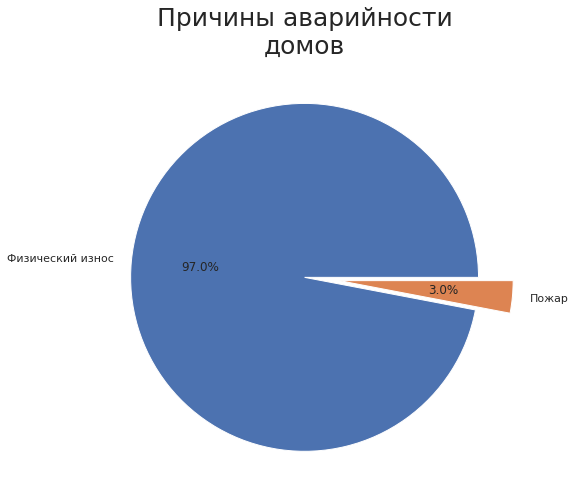

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
labels = ['Физический износ','Пожар']
explode = (0,0.2)
sns.set()
plt.title('Причины аварийности\nдомов',fontsize=25)
plt.pie(j,labels = labels,autopct='%1.1f%%',explode=explode)
plt.show()

**Сколько домов признавалось аварийными по годам?**

In [ ]:
df['determined_date'] = pd.to_datetime(df['determined_date'])

In [ ]:
df['determined_date'].dt.year.unique()

array([2010.,   nan, 2003., 2008., 2009., 2017., 2015., 2014., 2007.,
       1993., 1998., 2018., 2002., 2016., 2019., 1995., 2013., 2011.,
       2006., 2005., 1994., 2004., 2000., 1990., 1996., 2001., 1997.,
       1969., 1987., 1966., 2012., 1991., 1989., 1979., 1978., 1988.,
       1986., 1999., 1967., 1981., 1973., 1992., 1963., 1982., 1984.,
       1968., 1976., 1980.])

In [ ]:
i = df[df.alarm_has_file == 'Имеется'].determined_date.dt.year.dropna()
#j = i.determined_date.dt.year.dropna()
i

5       2010.0
6       2010.0
9       2010.0
12      2010.0
14      2010.0
         ...  
4289    2017.0
4290    2018.0
4291    2015.0
4292    2016.0
4293    2018.0
Name: determined_date, Length: 1201, dtype: float64

In [ ]:
df['1111'] = pd.Timestamp.now().year - i

In [ ]:
df[df['1111'] < 0]
# все дома, которые признаны аварийными, уже устарели, независимо
# от причины признания их аварийными

,formalname_region,formalname_city,address,cadastral_registration_date,stage,built_year,exploitation_start_year,project_type,house_type,floor_count_max,floor_count_min,entrance_count,residents_count,area_total,area_residential,area_non_residential,area_common_property,area_land,monument_status,monument_document_date,monument_document_number,deterioration_total,determined_date,floor_type,wall_material,alarm_reason,alarm_reason_other,alarm_document_number,alarm_has_file,exp_name,exp_document_number,exp_document_date,exp_has_file,commission_document_number,commission_document_date,commission_has_file,further_use,decision_deadline_date,planned_resettlement_date,actual_resettlement_date,planned_rooms_count,planned_rooms_square,planned_ppl_count,planned_demolition_date,resettled_rooms_count,resettled_rooms_square,resettled_ppl_count,empty_rooms_count,empty_rooms_square,redemption_amount,planned_providing_area_square,alarm_document_date,year_alarm_document,date_alarm,1111
